In [3]:
import numpy as np
from sklearn import datasets

# 加载鸢尾花数据集
iris = datasets.load_iris()
X = iris.data[:100, :2]  # 取前100个样本的前两个特征（这些样本只包括Setosa和Versicolor）
y = iris.target[:100]    # 取前100个样本的目标变量

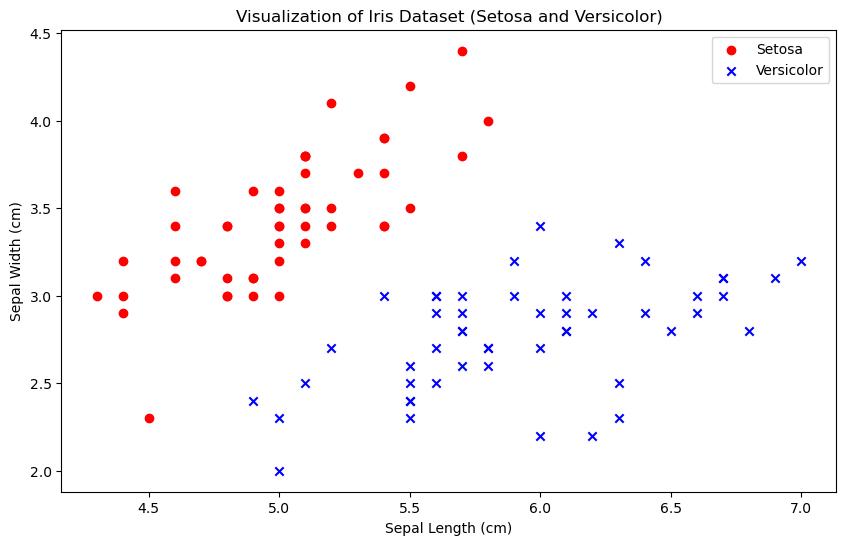

In [11]:
import matplotlib.pyplot as plt

# Visualize the dataset
plt.figure(figsize=[10,6])
# Plot Setosa samples
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Setosa')
# Plot Versicolor samples
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Versicolor')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(loc='upper right')
plt.title('Visualization of Iris Dataset (Setosa and Versicolor)')
plt.show()

In [4]:
# 数据预处理：随机打乱数据集
np.random.seed(1)  # 确保可复现性
indices = np.random.permutation(len(X))
X_shuffled = X[indices]
y_shuffled = y[indices]

In [8]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=50, random_state=42):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.weight_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        # self.weight_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weight_[1:] += update * xi
                self.weight_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight_[1:]) + self.weight_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

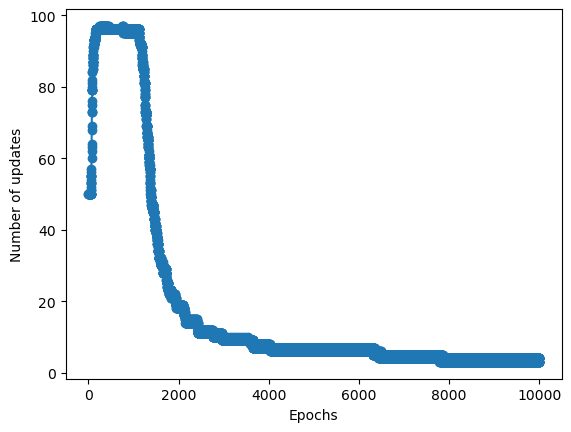

In [19]:
# 实例化Perceptron对象
ppn = Perceptron(learning_rate=0.0000001, n_iter=10000)

# 使用数据集X和y训练模型
ppn.fit(X, y)

# 绘制每次迭代后错误分类的样本数量
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# 显示图表
plt.show()

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 设置标记点和颜色
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 绘制决策面
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 绘制类别样本
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

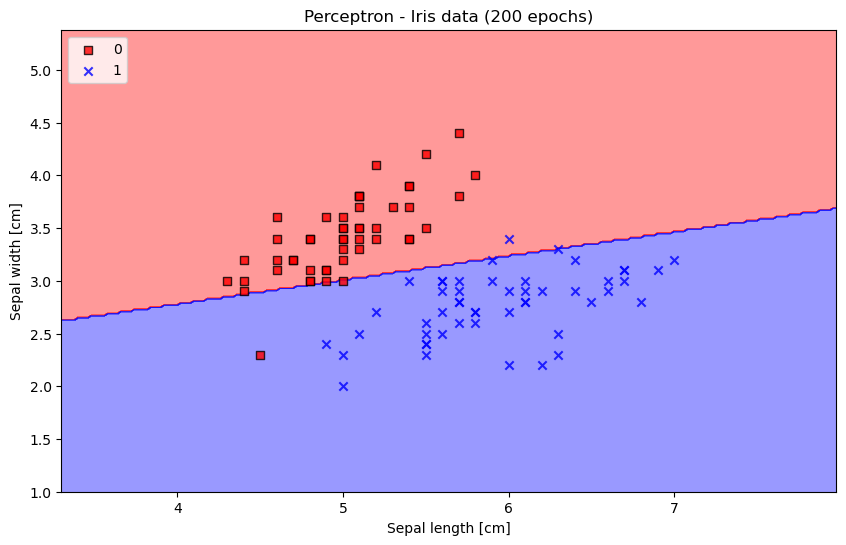

In [21]:
plt.figure(figsize=[10, 6])
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Sepal width [cm]')
plt.legend(loc='upper left')
plt.title('Perceptron - Iris data (200 epochs)')
plt.show()

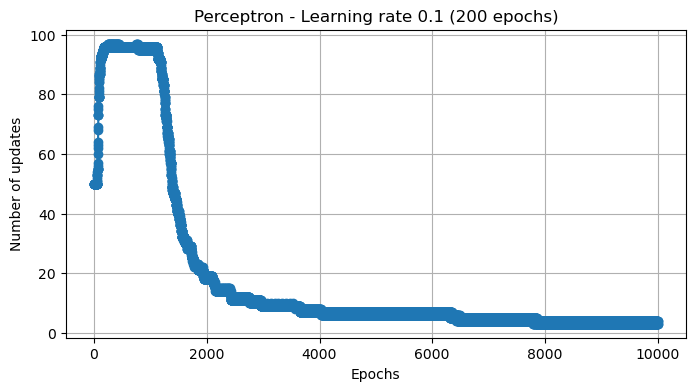

In [22]:
plt.figure(figsize=[8, 4])
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title('Perceptron - Learning rate 0.1 (200 epochs)')
plt.grid(True)
plt.show()

In [1]:
import sklearn
from sklearn.linear_model import Perceptron

In [14]:
clf = Perceptron(fit_intercept=True, max_iter=1000, shuffle=True, tol=None)
clf.fit(X, y)

Perceptron(tol=None)

In [15]:
clf.coef_, clf.intercept_

(array([[ 70.7, -87.9]]), array([-117.]))

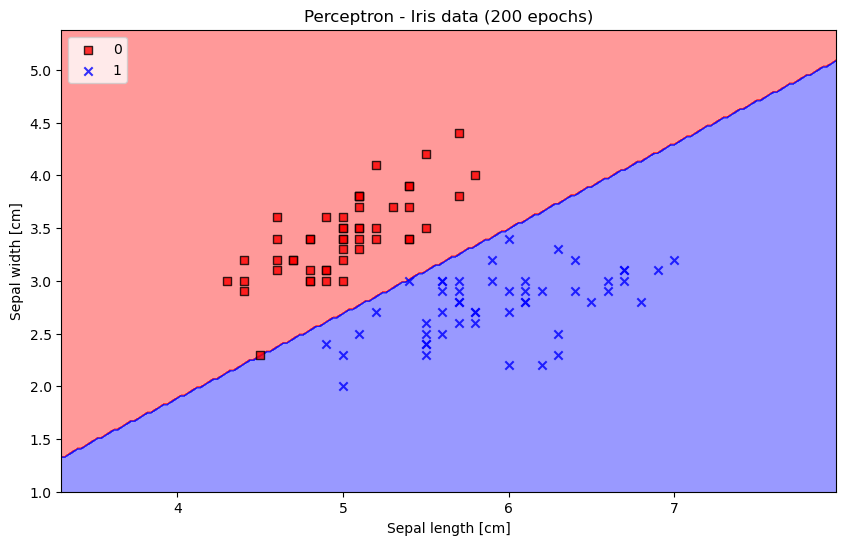

In [16]:
plt.figure(figsize=[10, 6])
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Sepal width [cm]')
plt.legend(loc='upper left')
plt.title('Perceptron - Iris data (200 epochs)')
plt.show()